In [91]:
import os, sys
import iris
import numpy
import iris.plot as iplt
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('talk')

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio
import timeseries
import convenient_universal as uconv


In [92]:
def calc_anomaly(cube):
    """Calculate the anomaly."""
    
    anomaly = cube.copy()
    anomaly.data = anomaly.data - anomaly.data[0]
    
    return anomaly


def get_data(model):
    """Get the hfds, ohc and hfbasin data"""

    hfds_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/historical/yr/ocean/r1i1p1/hfds/latest/dedrifted/hfds-zonal-sum_Oyr_%s_historical_r1i1p1_cumsum-all.nc' %(model, model)
    ohc_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/historical/yr/ocean/r1i1p1/ohc/latest/dedrifted/ohc-zonal-sum_Oyr_%s_historical_r1i1p1_all.nc' %(model, model)
    hfbasin_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/historical/yr/ocean/r1i1p1/hfbasin/latest/dedrifted/hfbasin-global_Oyr_%s_historical_r1i1p1_cumsum-all.nc' %(model, model)
    
    time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])
    
    ohc_cube = iris.load_cube(ohc_file, 'ocean heat content' & time_constraint)
    hfds_cube = iris.load_cube(hfds_file, 'surface_downward_heat_flux_in_sea_water' & time_constraint)
    hfbasin_cube = iris.load_cube(hfbasin_file, 'northward_ocean_heat_transport' & time_constraint)
    
    ohc_anomaly = calc_anomaly(ohc_cube)
    hfds_anomaly = calc_anomaly(hfds_cube)
    hfbasin_anomaly = calc_anomaly(hfbasin_cube)
    
    convergence = ohc_anomaly[-1, ::] - hfds_anomaly[-1, ::]
    
    hfbasin = convergence.copy()
    hfbasin.data = numpy.ma.cumsum(-1 * convergence.data)
    
    return ohc_anomaly, hfds_anomaly, hfbasin_anomaly, convergence, hfbasin

In [94]:
ohc_anomaly, hfds_anomaly, hfbasin_anomaly, convergence, hfbasin = get_data('CSIRO-Mk3-6-0')

In [95]:
%matplotlib inline

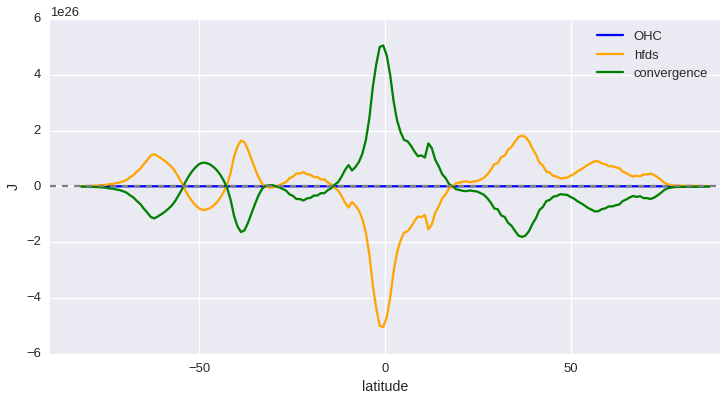

In [97]:
fig, ax = plt.subplots(figsize=[12, 6])

iplt.plot(ohc_anomaly[-1, ::], color='blue', label='OHC')
iplt.plot(hfds_anomaly[-1, ::], color='orange', label='hfds')
iplt.plot(convergence, color='green', label='convergence')

plt.xlabel('latitude')
plt.ylabel('J')
plt.xlim(-90, 90)

plt.axhline(y=0, color='0.5', linestyle='--')

plt.legend()
plt.show()

In [98]:
ohc_anomaly[-1, ::].data.sum()

2.6108229638745892e+23

In [99]:
hfds_anomaly[-1, ::].data.sum()

1.6297155871557401e+26

These totals match the [corresponding global timeseries](https://www.flickr.com/photos/69921266@N08/40373452040/). 

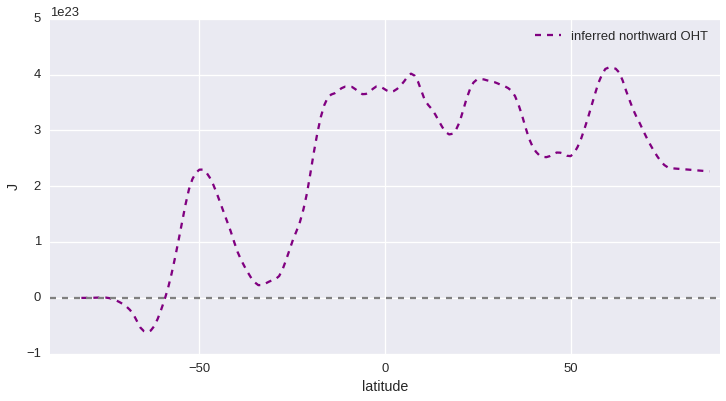

In [87]:
fig, ax = plt.subplots(figsize=[12, 6])

#iplt.plot(hfbasin_anomaly[-1, ::], color='purple', label='northward OHT')
iplt.plot(hfbasin, color='purple', linestyle='--', label='inferred northward OHT')

plt.xlabel('latitude')
plt.ylabel('J')
plt.xlim(-90, 90)

plt.axhline(y=0, color='0.5', linestyle='--')

plt.legend()
plt.show()

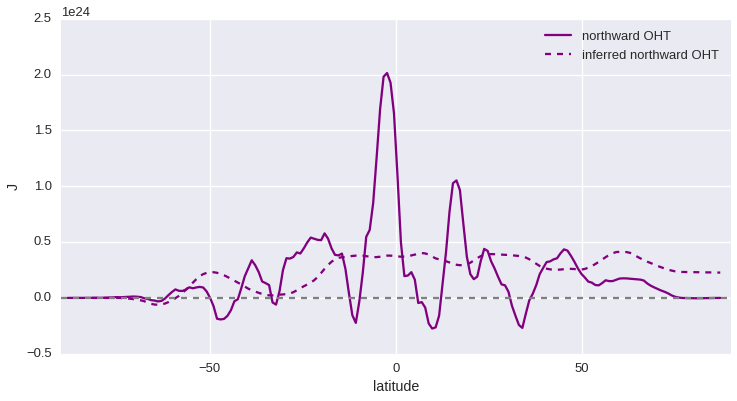

In [88]:
fig, ax = plt.subplots(figsize=[12, 6])

iplt.plot(hfbasin_anomaly[-1, ::], color='purple', label='northward OHT')
iplt.plot(hfbasin, color='purple', linestyle='--', label='inferred northward OHT')

plt.xlabel('latitude')
plt.ylabel('J')
plt.xlim(-90, 90)

plt.axhline(y=0, color='0.5', linestyle='--')

plt.legend()
plt.show()

In [89]:
hfbasin_anomaly[-1, ::].data.sum()

3.8603516768860879e+25

In [90]:
hfbasin.data.sum()

4.1898919017094753e+25